In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os


# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5x')

Using cache found in C:\Users\fuyua/.cache\torch\hub\ultralytics_yolov5_master


requirements: Ultralytics requirement ['ultralytics>=8.0.232'] not found, attempting AutoUpdate...
     ---------------------------------------- 40.2/40.2 kB ? eta 0:00:00
   -------------------------------------- 709.3/709.3 kB 110.8 kB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.231
    Uninstalling ultralytics-8.0.231:
      Successfully uninstalled ultralytics-8.0.231

requirements: AutoUpdate success ✅ 14.8s, installed 1 package: ['ultralytics>=8.0.232']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5  2024-2-5 Python-3.11.4 torch-2.1.2+cpu CPU

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
Adding AutoShape... 


# Load Custom Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\fuyua/.cache\torch\hub\master.zip
YOLOv5  2024-2-6 Python-3.11.4 torch-2.1.2+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [4]:
img = os.path.join('IMG_1061.jpg')

In [5]:
results = model(img)

In [6]:
results.print()

image 1/1: 4032x3024 5 leafs, 5 unripe_tomatos
Speed: 698.3ms pre-process, 327.9ms inference, 54.4ms NMS per image at shape (1, 3, 640, 480)


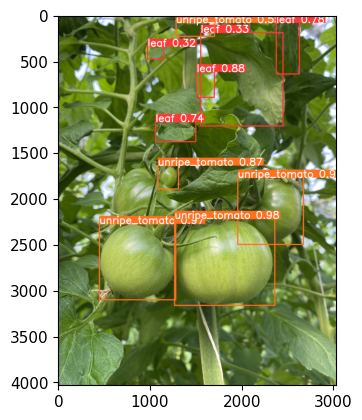

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()